In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

In [10]:
MensShoes=pd.read_csv('/home/ubuntu/Data/MensShoes.csv')
menPixel=np.load('/home/ubuntu//Data/menPixel.npy')

In [11]:
WomensShoes=pd.read_csv('/home/ubuntu/Data/WomensShoes.csv')
womenPixel=np.load('/home/ubuntu//Data/womenPixel.npy')

In [12]:
WomensShoes=pd.read_csv('/home/ubuntu/Data/WomensShoes.csv')
womenPixel_Gray=np.load('/home/ubuntu//Data/womenPixel_Gray.npy')

In [73]:
menPixel_Gray=np.load('/home/ubuntu//Data/menPixel_Gray.npy')

In [13]:
womenPixel_Gray[0,0,0]

255

In [14]:
MensShoes['image'][0]

'http://s2.onlineshoes.com/images/br008/mens-new-balance-mw577vk-black-w-hook-and-loop-253242_120_45.jpg'

In [15]:
def multiple_image_show(imL):
    n_rows=np.floor(np.sqrt(len(imL))).astype(int)
    temp_arr=np.concatenate( [[np.concatenate([imL[i] for i in range((j-1)*n_rows,j*n_rows)],axis=1)] for j in range(0,n_rows)],axis=1)
    print "Missing " + str(int(len(imL) - n_rows*n_rows)) + " Input Image/s"
    plt.imshow(temp_arr[0,:,:,:].astype('uint8'))
    plt.axis('off')
    plt.show()

In [16]:
def multiple_image_show_gray(imL,I,J,K):
    n_rows=np.floor(np.sqrt(len(imL))).astype(int)
    temp_arr=np.concatenate( [[np.concatenate([imL[i] for i in range((j-1)*n_rows,j*n_rows)],axis=1)] for j in range(0,n_rows)],axis=1)
    plt.subplot(I,J,K)
    plt.title ("Missing " + str(int(len(imL) - n_rows*n_rows)) + " Input Image/s")
    plt.imshow(temp_arr[0,:,:].astype('uint8'),cmap="gray")
    plt.axis('off')

In [17]:
n_samples=16
n_start=1500

Missing 0 Input Image/s


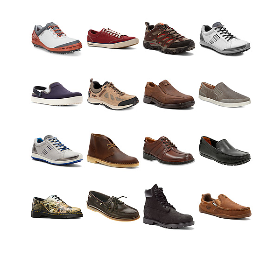

In [18]:
pixel=menPixel[:,:,:,n_start:n_start+n_samples]
multiple_image_show([pixel[:,:,:,i] for i in range(0,n_samples)])

In [19]:
combined=[np.concatenate([pixel_Gray[:,:,i] for i in range(0,16)],axis=1)]
plt.imshow(combined[0].astype('uint8'),cmap='gray')
plt.axis('off')

NameError: name 'pixel_Gray' is not defined

In [ ]:
combined=[np.concatenate([pixel_Gray[:,:,i] for i in range(0,16)],axis=0)]
plt.imshow(combined[0].astype('uint8'),cmap='gray')
plt.axis('off')

In [20]:
np.shape(combined)

NameError: name 'combined' is not defined

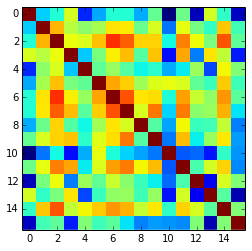

In [21]:
sim_ind_pixel=np.zeros([16,16])
for i in range(0,n_samples):
    V=np.reshape(pixel[:,:,:,i],120*120*3)
    for j in range(0,n_samples):
        U=np.reshape(pixel[:,:,:,j],120*120*3)
        sim_ind_pixel[i,j]=pearsonr(V,U)[0]
sim_ind_pixel        
plt.imshow(sim_ind_pixel,interpolation='none')

In [22]:
pixel_Gray=np.zeros([120,120,n_samples])
for i in range(0,n_samples):
    pixel_Gray[:,:,i]=(0.299*menPixel[:,:,0,n_start+i]+0.587*menPixel[:,:,1,n_start+i]+0.114*menPixel[:,:,2,n_start+i]).astype('uint8')   

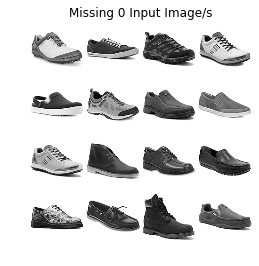

In [23]:
multiple_image_show_gray([pixel_Gray[:,:,i] for i in range(0,n_samples)],1,1,1)


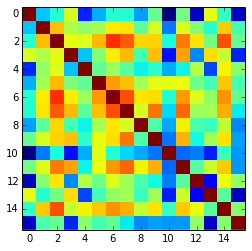

In [24]:
sim_ind_pixel_Gray=np.zeros([16,16])
for i in range(0,n_samples):
    V=np.reshape(pixel_Gray[:,:,i],120*120)
    for j in range(0,n_samples):
        U=np.reshape(pixel_Gray[:,:,j],120*120)
        sim_ind_pixel_Gray[i,j]=pearsonr(V,U)[0]
sim_ind_pixel_Gray        
plt.imshow(sim_ind_pixel_Gray,interpolation='none')
plt.show()

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


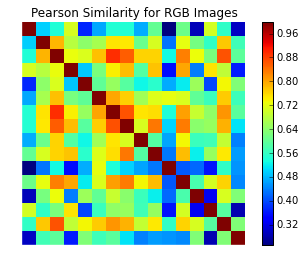

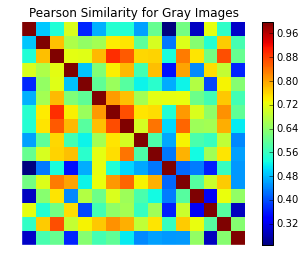

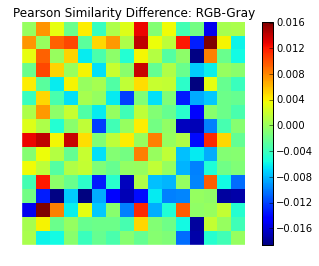

In [25]:
plt.imshow(sim_ind_pixel,interpolation='none')
plt.title("Pearson Similarity for RGB Images")
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(sim_ind_pixel_Gray,interpolation='none')
plt.title("Pearson Similarity for Gray Images")
plt.colorbar()
plt.axis('off')
plt.show()
plt.imshow(sim_ind_pixel-sim_ind_pixel_Gray,interpolation='none')
plt.title("Pearson Similarity Difference: RGB-Gray")
plt.colorbar()
plt.axis('off')
plt.show()


In [26]:
print sim_ind_pixel[:,15]

sim_ind_pixel[0,13]

[ 0.29896118  0.57076612  0.59969931  0.36579692  0.62920107  0.57025161
  0.5952608   0.51492028  0.4407072   0.46122396  0.45555625  0.44576781
  0.62964362  0.28604231  0.62979212  1.        ]


0.70668067388655709

(array([  8.,  12.,  26.,  26.,  46.,  32.,  56.,  26.,   8.,  16.]),
 array([ 0.25225584,  0.32703025,  0.40180467,  0.47657909,  0.5513535 ,
         0.62612792,  0.70090234,  0.77567675,  0.85045117,  0.92522558,  1.        ]),
 <a list of 10 Patch objects>)

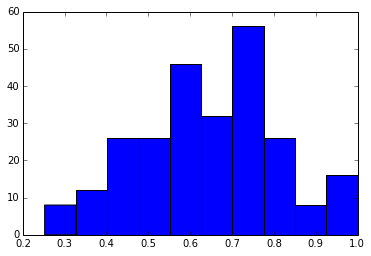

In [27]:
plt.hist(sim_ind_pixel.flatten())

In [28]:
sort_val=np.sort(sim_ind_pixel[:,0])
sort_ind= np.argsort(sim_ind_pixel[:,0])[::-1]
val=(sort_val-sort_val[0])/(sort_val[14]-sort_val[0])
print sim_ind_pixel[:,0]
print sort_ind

combined=[np.concatenate([pixel[:,:,:,sort_ind[i]] for i in range(0,16)],axis=1)]

# print val
# multiple_image_show([pixel[:,:,:,sort_ind[15]]])
# multiple_image_show([pixel[:,:,:,sort_ind[i]] for i in range(0,4)])
# multiple_image_show([pixel[:,:,:,sort_ind[i]] for i in range(4,8)])
# multiple_image_show([pixel[:,:,:,sort_ind[i]] for i in range(8,12)])
# multiple_image_show([pixel[:,:,:,sort_ind[i]] for i in range(12,16)])
# multiple_image_show([pixel[:,:,:,sort_ind[i]] for i in range(1,15)])

[ 1.          0.49844479  0.54380169  0.70803988  0.37356721  0.4700139
  0.5470873   0.54569319  0.47403572  0.60378863  0.25225584  0.61390293
  0.29225457  0.70668067  0.5569362   0.29896118]
[ 0  3 13 11  9 14  6  7  2  1  8  5  4 15 12 10]


[ 1.          0.70803988  0.70668067  0.61390293  0.60378863  0.5569362
  0.5470873   0.54569319  0.54380169  0.49844479  0.47403572  0.4700139
  0.37356721  0.29896118  0.29225457  0.25225584]


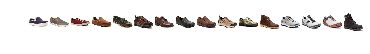

In [29]:
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
print sort_val[::-1]

In [30]:
sort_val=np.sort(sim_ind_pixel_Gray[:,0])
sort_ind= np.argsort(sim_ind_pixel_Gray[:,0])[::-1]
val=(sort_val-sort_val[0])/(sort_val[14]-sort_val[0])

combined_Gray=[np.concatenate([pixel_Gray[:,:,sort_ind[i]] for i in range(0,16)],axis=1)]


[ 1.          0.72182815  0.70992532  0.61749136  0.60468489  0.55633582
  0.54618741  0.54274866  0.54042638  0.49093355  0.47411421  0.46123163
  0.36921766  0.29816619  0.29380065  0.24847812]


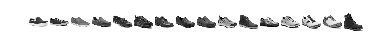

In [31]:
plt.imshow(combined_Gray[0].astype('uint8'),cmap="gray")
plt.axis('off')
print sort_val[::-1]

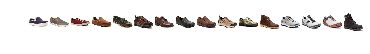

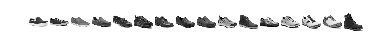

In [32]:
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()
plt.imshow(combined_Gray[0].astype('uint8'),cmap="gray")
plt.axis('off')
plt.show()

In [33]:
Names=['0_m.jpg', '1_m.jpg', '2_m.jpg', '3_m.jpg', '4_m.jpg', '5_m.jpg',
       '6_m.jpg', '7_m.jpg', '8_m.jpg', '9_m.jpg']

In [89]:
Names=['0_m.jpg', '1_m.jpg', '2_m.jpg', '3_m.jpg', '4_m.jpg', '5_m.jpg',
       '6_m.jpg', '7_m.jpg', '8_m.jpg', '9_m.jpg']
from PIL import Image
fname = '/home/ubuntu/'+Names[9]
img = Image.open(fname).convert("L")
arr = np.asarray(img)

Query Time: 5.868319


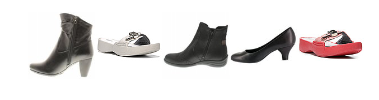

In [90]:
n_samples=24000
n_start=0
pixel=womenPixel_Gray[:,:,n_start:n_start+n_samples]
import time
t0=time.clock()
sim_ind_pixel=np.zeros([n_samples])
for i in range(0,1):
    V=np.reshape(arr,120*120)
    for j in range(0,n_samples):
        U=np.reshape(pixel[:,:,j],120*120)
        sim_ind_pixel[j]=pearsonr(V,U)[0]
t1=time.clock()        
print "Query Time:", t1-t0
sort_val=np.sort(sim_ind_pixel)
sort_ind= np.argsort(sim_ind_pixel)[::-1]
val=(sort_val-sort_val[0])/(sort_val[14]-sort_val[0])
combined=[np.concatenate([womenPixel[:,:,:,sort_ind[i]] for i in range(3,8)],axis=1)]
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()

Query Time: 3.751086


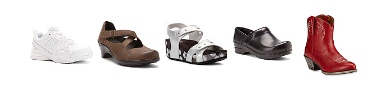

In [86]:
n_samples=9929
n_start=0
pixel=menPixel_Gray[:,:,n_start:n_start+n_samples]
import time
t0=time.clock()
sim_ind_pixel=np.zeros([n_samples])
for i in range(0,1):
    V=np.reshape(arr,120*120)
    for j in range(0,n_samples):
        U=np.reshape(pixel[:,:,j],120*120)
        sim_ind_pixel[j]=pearsonr(V,U)[0]
t1=time.clock()        
print "Query Time:", t1-t0
sort_val=np.sort(sim_ind_pixel)
sort_ind= np.argsort(sim_ind_pixel)[::-1]
val=(sort_val-sort_val[0])/(sort_val[14]-sort_val[0])
combined=[np.concatenate([womenPixel[:,:,:,sort_ind[i]] for i in range(3,8)],axis=1)]
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()

In [27]:
sort_ind[3]

0

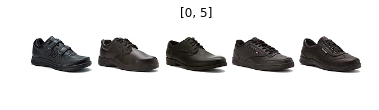

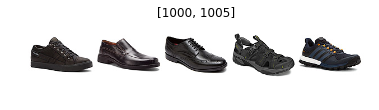

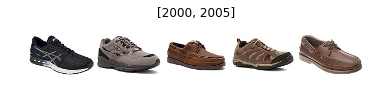

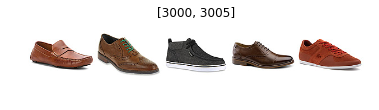

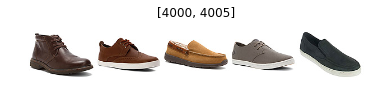

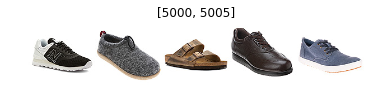

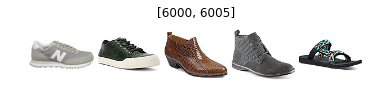

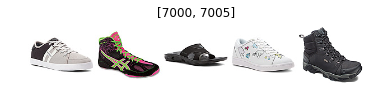

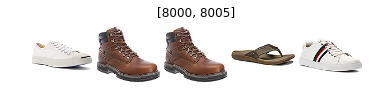

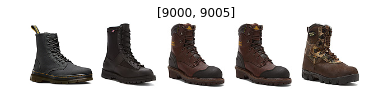

In [28]:
for I in range(0,10):
    combined=[np.concatenate([pixel[:,:,:,sort_ind[i]] for i in range(1000*I+3,1000*I+5+3)],axis=1)]
    plt.imshow(combined[0].astype('uint8'))
    plt.title([1000*I,1000*I+5])
    plt.axis('off')
    plt.show()

In [28]:
pixel_Gray=np.zeros([120,120,n_samples])
for i in range(0,n_samples):
    pixel_Gray[:,:,i]=(0.299*menPixel[:,:,0,n_start+i]+0.587*menPixel[:,:,1,n_start+i]+0.114*menPixel[:,:,2,n_start+i]).astype('uint8')

In [29]:
import time
t0=time.clock()
sim_ind_pixel_Gray=np.zeros([n_samples])
for i in range(0,1):
    V=np.reshape(pixel_Gray[:,:,i],120*120)
    for j in range(0,n_samples):
        U=np.reshape(pixel_Gray[:,:,j],120*120)
        sim_ind_pixel_Gray[j]=pearsonr(V,U)[0]
t1=time.clock()        
print "Query Time:", t1-t0

Query Time: 2.680897


In [30]:
sort_val=np.sort(sim_ind_pixel_Gray)
sort_ind= np.argsort(sim_ind_pixel_Gray)[::-1]
val=(sort_val-sort_val[0])/(sort_val[14]-sort_val[0])

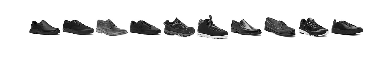

In [31]:
combined_Gray=[np.concatenate([pixel_Gray[:,:,sort_ind[i]] for i in range(1540,1550)],axis=1)]
plt.imshow(combined_Gray[0].astype('uint8'),cmap="gray")
plt.axis('off')
plt.show()

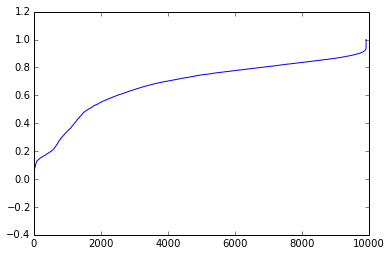

In [32]:
plt.plot(sort_val)

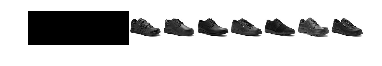

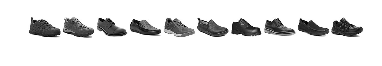

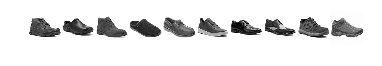

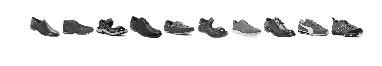

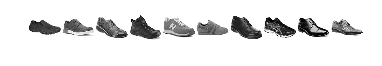

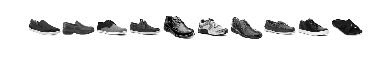

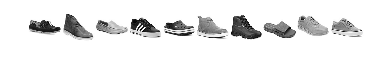

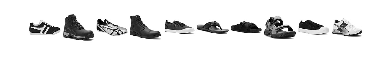

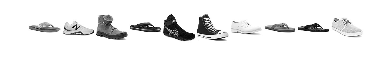

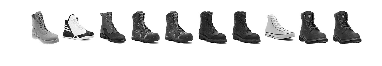

In [33]:
for i in range(0,10):
    combined_Gray=[np.concatenate([pixel_Gray[:,:,sort_ind[i]] for i in range(1000*i,1000*i+10)],axis=1)]
    plt.imshow(combined_Gray[0].astype('uint8'),cmap="gray")
    plt.axis('off')
    plt.show()

In [34]:
z=789
for i in range(0,10):
    plt.imshow(combined_Original[0].astype('uint8'))
    plt.axis('off')
    plt.show()
    combined=[np.concatenate([pixel[:,:,:,sort_ind[j]] for j in range(1000*i,1000*i+5)],axis=1)]
    plt.imshow(combined[0].astype('uint8'))
    plt.axis('off')
    plt.show()
    combined_Gray=[np.concatenate([pixel_Gray[:,:,sort_ind[j]] for j in range(1000*i,1000*i+5)],axis=1)]
    plt.imshow(combined_Gray[0].astype('uint8'),cmap="gray")
    plt.axis('off')
    plt.show()


NameError: name 'combined_Original' is not defined

In [ ]:
from PIL import Image
query=Image.open('/Users/Shahram/Desktop/Sample_Query.jpeg')

In [ ]:
query.size

In [ ]:
query.resize((120,120))

In [ ]:
np.shape(query.resize((120,120)))

In [ ]:
import time
t0=time.clock()
sim_ind_pixel=np.zeros([n_samples])
for i in range(0,1):
    V=np.reshape(query.resize((120,120)),120*120*3)
    for j in range(0,n_samples):
        U=np.reshape(pixel[:,:,:,j],120*120*3)
        sim_ind_pixel[j]=pearsonr(V,U)[0]
t1=time.clock()        
print "Query Time:", t1-t0

In [ ]:
sort_val=np.sort(sim_ind_pixel)
sort_ind= np.argsort(sim_ind_pixel)

In [ ]:
sort_val[9900:9950]

In [ ]:
sort_ind[9900:9950]

In [ ]:
plt.subplot(2,1,1)
plt.imshow(menPixel[:,:,:,121].astype('uint8'))
plt.show()
plt.subplot(2,1,2)
plt.imshow(np.asarray(query.resize((120,120))))
plt.show()

In [ ]:
4781, 9500, 9497